In [1]:
datapath = 'C:\\Users\\Keshaw Kumar\\Downloads\\Huawei-IRC-Hackathon-2022-dataset-v3\\' # datapath 

In [2]:
import os
import pandas as pd

In [4]:
train = pd.read_csv(os.path.join(datapath, 'hch_train_ads.csv'))[:200000]

In [5]:
test = pd.read_csv(os.path.join(datapath, 'test_data.csv'))

In [6]:
userdata = pd.read_csv(os.path.join(datapath, 'hch_user_data.csv'))

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
train = train.drop(['ad_click_list_v001_1', 'ad_click_list_v001_2', 'ad_click_list_v001_3',
       'ad_click_list_v001_4', 'ad_close_list_v001_1', 'ad_close_list_v001_2', 'ad_close_list_v001_3',
       'ad_close_list_v001_4','ad_close_list_v002_1',
       'ad_close_list_v002_2', 'ad_close_list_v002_3', 'ad_close_list_v002_4','ad_close_list_v003_1', 'ad_close_list_v003_2',
       'ad_close_list_v003_3', 'ad_close_list_v003_4'], axis = 1) # Dropping all the columns with high percentage of null values

In [9]:
test = test.drop(['ad_click_list_v001_1', 'ad_click_list_v001_2', 'ad_click_list_v001_3',
       'ad_click_list_v001_4', 'ad_close_list_v001_1', 'ad_close_list_v001_2', 'ad_close_list_v001_3',
       'ad_close_list_v001_4','ad_close_list_v002_1',
       'ad_close_list_v002_2', 'ad_close_list_v002_3', 'ad_close_list_v002_4','ad_close_list_v003_1', 'ad_close_list_v003_2',
       'ad_close_list_v003_3', 'ad_close_list_v003_4'], axis = 1) 

In [10]:
train = train.fillna(0) # filling the null values with 0

In [11]:
train = train.drop(['unix_ts_minute', 'log_id'], axis = 1)

In [124]:
train = pd.merge(train, userdata, on = 'user_id', how = 'left')

In [ ]:
test = pd.merge(test, userdata, on = 'user_id', how = 'left')

In [125]:
first_column = train.pop('clicked')
train.insert(0, 'clicked', first_column)

In [204]:
test.columns

Index(['log_id', 'unix_ts_minute', 'user_id', 'device_size', 'net_type',
       'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id', 'inter_type_cd',
       'slot_id', 'site_id', 'spread_app_id', 'hispace_app_tags',
       'app_second_class', 'app_score', 'u_refreshTimes', 'u_feedLifeCycle',
       'ad_click_list_v001_0', 'ad_click_list_v001_1', 'ad_click_list_v001_2',
       'ad_click_list_v001_3', 'ad_click_list_v001_4', 'ad_click_list_v002_0',
       'ad_click_list_v002_1', 'ad_click_list_v002_2', 'ad_click_list_v002_3',
       'ad_click_list_v002_4', 'ad_click_list_v003_0', 'ad_click_list_v003_1',
       'ad_click_list_v003_2', 'ad_click_list_v003_3', 'ad_click_list_v003_4',
       'ad_close_list_v001_0', 'ad_close_list_v001_1', 'ad_close_list_v001_2',
       'ad_close_list_v001_3', 'ad_close_list_v001_4', 'ad_close_list_v002_0',
       'ad_close_list_v002_1', 'ad_close_list_v002_2', 'ad_close_list_v002_3',
       'ad_close_list_v002_4', 'ad_close_list_v003_0', 'ad_close_list_v003_

In [205]:
test = test.drop(columns = ['ad_click_list_v001_1', 'ad_click_list_v001_2', 'ad_click_list_v001_3',
       'ad_click_list_v001_4', 'ad_close_list_v001_1', 'ad_close_list_v001_2', 'ad_close_list_v001_3',
       'ad_close_list_v001_4','ad_close_list_v002_1',
       'ad_close_list_v002_2', 'ad_close_list_v002_3', 'ad_close_list_v002_4','ad_close_list_v003_1', 'ad_close_list_v003_2',
       'ad_close_list_v003_3', 'ad_close_list_v003_4'], axis = 1)

In [206]:
test = test.fillna(0) # filled the null values with 0

In [41]:
train = train.fillna(0) #filled the null values with 0 in train

In [30]:
import numpy as np
import catboost

In [208]:
train.head()

,clicked,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,0,11611631,2117,2,10653,1233,1,1220,0,17,0,209,25,2,10,0,11,22934,1036,0,0,0,0,151,274,326,300,305,24107,1218,173,7,2,30,204,4,14,2,5,201
1,0,20622029,2117,2,22100,3974,1,1036,0,17,0,209,3,2,10,5,12,25872,1126,0,0,0,0,151,274,251,325,0,24107,1218,173,7,0,1,330,2,9,1,6,138
2,0,85552008,2117,2,14584,11426,1,1036,0,17,0,209,17,2,10,7,12,27024,1537,0,0,0,0,151,274,319,300,162,24107,1218,173,6,1,15,21,3,0,3,25,104
3,0,69038783,2117,2,16502,11273,1,1036,1,17,0,209,16,2,10,5,11,12085,1611,0,0,0,0,151,274,218,300,280,24107,1218,173,8,0,11,36,2,9,1,23,132
4,0,41837711,2117,2,16502,11209,1,1036,1,17,0,209,16,2,10,8,12,25872,1482,0,0,0,0,151,274,118,300,162,24107,1218,173,2,0,34,215,5,1,6,16,123


In [209]:
test = test.drop(columns = ['log_id', 'unix_ts_minute'], axis = 1)

In [207]:
train = train.drop(columns = ['log_id', 'unix_ts_minute'], axis = 1) # dropping some columns

KeyError: "['log_id', 'unix_ts_minute'] not found in axis"

In [32]:
train = pd.merge(train, userdata, on = 'user_id', how = 'left')

In [137]:
test = pd.merge(test, userdata, on = 'user_id', how = 'left')

In [54]:
test = test.drop(columns = ['ffill_u_phonePrice','ffill_u_browserMode','ffill_i_regionEntity'], axis = 1)

In [143]:
test.head()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,6672277,24320900,93865755,2172,4,12294,7231,1,1106,1,17,0,294,42,0,0,0,17,23142,1966,1363.0,1875.0,1633.0,1154.0,143,196.0,252.0,194.0,162.0,33877,1134,150,7,0,8,152,2,3,5,23,16
1,6672278,24320900,92261551,2172,1,12294,7231,1,1562,3,17,0,294,32,6,0,9,17,23142,1518,1557.0,1036.0,1185.0,1542.0,114,250.0,306.0,240.0,0.0,33877,1134,150,5,0,24,282,2,9,1,23,20
2,6672279,24320900,92261551,2172,5,12294,7231,1,1633,3,17,0,294,27,4,0,4,13,23142,1769,1112.0,0.0,1734.0,1154.0,114,108.0,243.0,194.0,0.0,33877,1134,150,5,0,24,282,2,9,1,23,20
3,6672290,24320902,96894553,2519,4,12294,7231,1,1633,3,19,0,294,32,0,10,5,17,23142,1482,1518.0,0.0,1734.0,1549.0,190,198.0,252.0,194.0,321.0,33877,1134,173,5,0,20,179,5,19,5,23,50
4,6672289,24320902,93865755,2117,1,12294,7231,1,1542,1,4,0,294,32,4,10,7,16,23142,1637,1535.0,0.0,1734.0,1391.0,114,361.0,321.0,194.0,306.0,33877,1134,150,7,0,8,152,2,3,5,23,16


In [144]:
test = test.astype({"ad_click_list_v003_1":"int64",
                      "ad_click_list_v003_2":"int64",
                      "ad_click_list_v003_3":"int64",
                      "ad_click_list_v003_4":"int64",
                     "ad_click_list_v002_1":"int64",
                     "ad_click_list_v002_2":"int64",
                     "ad_click_list_v002_3":"int64",
                     "ad_click_list_v002_4":"int64"})

In [145]:
test.head()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,6672277,24320900,93865755,2172,4,12294,7231,1,1106,1,17,0,294,42,0,0,0,17,23142,1966,1363,1875,1633,1154,143,196,252,194,162,33877,1134,150,7,0,8,152,2,3,5,23,16
1,6672278,24320900,92261551,2172,1,12294,7231,1,1562,3,17,0,294,32,6,0,9,17,23142,1518,1557,1036,1185,1542,114,250,306,240,0,33877,1134,150,5,0,24,282,2,9,1,23,20
2,6672279,24320900,92261551,2172,5,12294,7231,1,1633,3,17,0,294,27,4,0,4,13,23142,1769,1112,0,1734,1154,114,108,243,194,0,33877,1134,150,5,0,24,282,2,9,1,23,20
3,6672290,24320902,96894553,2519,4,12294,7231,1,1633,3,19,0,294,32,0,10,5,17,23142,1482,1518,0,1734,1549,190,198,252,194,321,33877,1134,173,5,0,20,179,5,19,5,23,50
4,6672289,24320902,93865755,2117,1,12294,7231,1,1542,1,4,0,294,32,4,10,7,16,23142,1637,1535,0,1734,1391,114,361,321,194,306,33877,1134,150,7,0,8,152,2,3,5,23,16


In [148]:
test = test.drop(['log_id', 'unix_ts_minute'], axis = 1)

In [100]:
first_column = train.pop('clicked')
train.insert(0, 'clicked', first_column)

In [129]:
train = train.astype({"ad_click_list_v003_1":"int64",
                      "ad_click_list_v003_2":"int64",
                      "ad_click_list_v003_3":"int64",
                      "ad_click_list_v003_4":"int64",
                     "ad_click_list_v002_1":"int64",
                     "ad_click_list_v002_2":"int64",
                     "ad_click_list_v002_3":"int64",
                     "ad_click_list_v002_4":"int64"})

In [170]:
test = test.astype({"ad_click_list_v003_1":"int64",
                      "ad_click_list_v003_2":"int64",
                      "ad_click_list_v003_3":"int64",
                      "ad_click_list_v003_4":"int64",
                     "ad_click_list_v002_1":"int64",
                     "ad_click_list_v002_2":"int64",
                     "ad_click_list_v002_3":"int64",
                     "ad_click_list_v002_4":"int64"})

In [189]:
y = train.clicked
X = train.drop('clicked', axis = 1)

In [190]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [172]:
from catboost import Pool
pool = Pool(data=X, label=y, cat_features=cat_features)

In [177]:
train = train.drop(columns = ['log_id'], axis = 1)

In [173]:
from sklearn.model_selection import train_test_split

In [192]:
data = train_test_split(X, y, test_size=0.2, random_state=123) #pool
X_train, X_validation, y_train, y_validation = data

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    cat_features=cat_features
)

validation_pool = Pool(
    data=X_validation, 
    label=y_validation, 
    cat_features=cat_features
)

In [193]:
X_validation.head()

,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
457117,33231396,1821,1,15295,7546,6,1518,2,49,0,332,3,2,10,0,12,33840,1966,0,0,0,0,152,0,0,0,0,24107,1218,173,5,0,30,273,2,25,6,23,208
147057,33231396,2103,4,13181,5433,1,1913,3,17,0,152,3,2,10,8,12,13507,1535,0,0,0,0,309,162,0,0,0,24107,1218,173,5,0,30,273,2,25,6,23,208
83556,6856205,2580,1,15295,7546,6,1550,0,17,0,312,0,19,6,7,17,10463,1236,0,0,0,0,246,152,257,199,162,24107,1218,173,3,0,8,164,5,4,4,24,142
254207,29742441,1135,1,14838,7546,8,1898,3,17,0,312,42,0,10,8,17,13723,2066,0,0,0,0,168,312,309,372,0,24107,1218,173,2,0,11,37,2,25,6,7,117
530588,34645922,1199,2,15295,7546,6,1466,3,17,0,309,0,11,10,8,17,25872,1966,0,0,0,0,321,257,168,0,0,24107,1218,173,7,0,16,107,2,25,6,23,117


In [194]:
train.head()

,clicked,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,0,11611631,2117,2,10653,1233,1,1220,0,17,0,209,25,2,10,0,11,22934,1036,0,0,0,0,151,274,326,300,305,24107,1218,173,7,2,30,204,4,14,2,5,201
1,0,20622029,2117,2,22100,3974,1,1036,0,17,0,209,3,2,10,5,12,25872,1126,0,0,0,0,151,274,251,325,0,24107,1218,173,7,0,1,330,2,9,1,6,138
2,0,85552008,2117,2,14584,11426,1,1036,0,17,0,209,17,2,10,7,12,27024,1537,0,0,0,0,151,274,319,300,162,24107,1218,173,6,1,15,21,3,0,3,25,104
3,0,69038783,2117,2,16502,11273,1,1036,1,17,0,209,16,2,10,5,11,12085,1611,0,0,0,0,151,274,218,300,280,24107,1218,173,8,0,11,36,2,9,1,23,132
4,0,41837711,2117,2,16502,11209,1,1036,1,17,0,209,16,2,10,8,12,25872,1482,0,0,0,0,151,274,118,300,162,24107,1218,173,2,0,34,215,5,1,6,16,123


In [45]:
from catboost import CatBoostClassifier

In [182]:
model1 = CatBoostClassifier(
    eval_metric='AUC',
    iterations=5000,
    learning_rate=0.01,
    early_stopping_rounds=20,
    verbose = 100
)
model1.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7547319	best: 0.7547319 (0)	total: 671ms	remaining: 55m 53s
1:	test: 0.7547422	best: 0.7547422 (1)	total: 2.24s	remaining: 1h 33m 18s
2:	test: 0.7979545	best: 0.7979545 (2)	total: 4.31s	remaining: 1h 59m 39s
3:	test: 0.7979545	best: 0.7979545 (2)	total: 5.18s	remaining: 1h 47m 49s
4:	test: 0.7979545	best: 0.7979545 (2)	total: 6.68s	remaining: 1h 51m 16s
5:	test: 0.7979545	best: 0.7979545 (2)	total: 7.15s	remaining: 1h 39m 8s
6:	test: 0.7988869	best: 0.7988869 (6)	total: 8.8s	remaining: 1h 44m 38s
7:	test: 0.8070408	best: 0.8070408 (7)	total: 10.3s	remaining: 1h 47m 30s
8:	test: 0.8138778	best: 0.8138778 (8)	total: 12.6s	remaining: 1h 56m 8s
9:	test: 0.8164359	best: 0.8164359 (9)	total: 13.5s	remaining: 1h 52m 27s
10:	test: 0.8164359	best: 0.8164359 (9)	total: 14.5s	remaining: 1h 49m 36s
11:	test: 0.8164303	best: 0.8164359 (9)	total: 16.1s	remaining: 1h 51m 47s
12:	test: 0.8186299	best: 0.8186299 (12)	total: 17.6s	remaining: 1h 52m 13s
13:	test: 0.8186125	best: 0.8186299 (12)

108:	test: 0.9367597	best: 0.9367597 (108)	total: 3m 29s	remaining: 2h 36m 25s
109:	test: 0.9385060	best: 0.9385060 (109)	total: 3m 31s	remaining: 2h 36m 55s
110:	test: 0.9395885	best: 0.9395885 (110)	total: 3m 34s	remaining: 2h 37m 21s
111:	test: 0.9397127	best: 0.9397127 (111)	total: 3m 36s	remaining: 2h 37m 49s
112:	test: 0.9397089	best: 0.9397127 (111)	total: 3m 39s	remaining: 2h 38m 31s
113:	test: 0.9401524	best: 0.9401524 (113)	total: 3m 42s	remaining: 2h 39m 9s
114:	test: 0.9402172	best: 0.9402172 (114)	total: 3m 45s	remaining: 2h 39m 31s
115:	test: 0.9397717	best: 0.9402172 (114)	total: 3m 48s	remaining: 2h 40m 6s
116:	test: 0.9397532	best: 0.9402172 (114)	total: 3m 50s	remaining: 2h 40m 33s
117:	test: 0.9404773	best: 0.9404773 (117)	total: 3m 53s	remaining: 2h 41m 4s
118:	test: 0.9409048	best: 0.9409048 (118)	total: 3m 56s	remaining: 2h 41m 34s
119:	test: 0.9408887	best: 0.9409048 (118)	total: 3m 59s	remaining: 2h 42m 1s
120:	test: 0.9410005	best: 0.9410005 (120)	total: 4m 1s	

213:	test: 0.9442900	best: 0.9449261 (205)	total: 8m 8s	remaining: 3h 2m 4s
214:	test: 0.9443214	best: 0.9449261 (205)	total: 8m 10s	remaining: 3h 2m 3s
215:	test: 0.9445769	best: 0.9449261 (205)	total: 8m 13s	remaining: 3h 2m 12s
216:	test: 0.9444498	best: 0.9449261 (205)	total: 8m 16s	remaining: 3h 2m 18s
217:	test: 0.9444560	best: 0.9449261 (205)	total: 8m 18s	remaining: 3h 2m 22s
218:	test: 0.9444340	best: 0.9449261 (205)	total: 8m 21s	remaining: 3h 2m 31s
219:	test: 0.9443748	best: 0.9449261 (205)	total: 8m 24s	remaining: 3h 2m 35s
220:	test: 0.9443846	best: 0.9449261 (205)	total: 8m 26s	remaining: 3h 2m 39s
221:	test: 0.9442747	best: 0.9449261 (205)	total: 8m 29s	remaining: 3h 2m 42s
222:	test: 0.9443571	best: 0.9449261 (205)	total: 8m 32s	remaining: 3h 2m 48s
223:	test: 0.9446562	best: 0.9449261 (205)	total: 8m 34s	remaining: 3h 2m 54s
224:	test: 0.9446663	best: 0.9449261 (205)	total: 8m 37s	remaining: 3h 2m 57s
225:	test: 0.9446608	best: 0.9449261 (205)	total: 8m 40s	remaining:

In [179]:
train.head()

,clicked,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,0,11611631,2117,2,10653,1233,1,1220,0,17,0,209,25,2,10,0,11,22934,1036,0,0,0,0,151,274,326,300,305,24107,1218,173,7,2,30,204,4,14,2,5,201
1,0,20622029,2117,2,22100,3974,1,1036,0,17,0,209,3,2,10,5,12,25872,1126,0,0,0,0,151,274,251,325,0,24107,1218,173,7,0,1,330,2,9,1,6,138
2,0,85552008,2117,2,14584,11426,1,1036,0,17,0,209,17,2,10,7,12,27024,1537,0,0,0,0,151,274,319,300,162,24107,1218,173,6,1,15,21,3,0,3,25,104
3,0,69038783,2117,2,16502,11273,1,1036,1,17,0,209,16,2,10,5,11,12085,1611,0,0,0,0,151,274,218,300,280,24107,1218,173,8,0,11,36,2,9,1,23,132
4,0,41837711,2117,2,16502,11209,1,1036,1,17,0,209,16,2,10,8,12,25872,1482,0,0,0,0,151,274,118,300,162,24107,1218,173,2,0,34,215,5,1,6,16,123


In [181]:
test.head()

,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,93865755,2172,4,12294,7231,1,1106,1,17,0,294,42,0,0,0,17,23142,1966,1363,1875,1633,1154,143,196,252,194,162,33877,1134,150,7,0,8,152,2,3,5,23,16
1,92261551,2172,1,12294,7231,1,1562,3,17,0,294,32,6,0,9,17,23142,1518,1557,1036,1185,1542,114,250,306,240,0,33877,1134,150,5,0,24,282,2,9,1,23,20
2,92261551,2172,5,12294,7231,1,1633,3,17,0,294,27,4,0,4,13,23142,1769,1112,0,1734,1154,114,108,243,194,0,33877,1134,150,5,0,24,282,2,9,1,23,20
3,96894553,2519,4,12294,7231,1,1633,3,19,0,294,32,0,10,5,17,23142,1482,1518,0,1734,1549,190,198,252,194,321,33877,1134,173,5,0,20,179,5,19,5,23,50
4,93865755,2117,1,12294,7231,1,1542,1,4,0,294,32,4,10,7,16,23142,1637,1535,0,1734,1391,114,361,321,194,306,33877,1134,150,7,0,8,152,2,3,5,23,16


In [200]:
print(model1.predict(test))

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:53: Feature device_name is Float in model but marked different in the dataset

In [199]:
test = test.astype({'device_name':'int64'})

In [168]:
train.head()

,clicked,log_id,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,0,0,11611631,2117,2,10653,1233,1,1220,0,17,0,209,25,2,10,0,11,22934,1036,0,0,0,0,151,274,326,300,305,24107,1218,173,7,2,30,204,4,14,2,5,201
1,0,1,20622029,2117,2,22100,3974,1,1036,0,17,0,209,3,2,10,5,12,25872,1126,0,0,0,0,151,274,251,325,0,24107,1218,173,7,0,1,330,2,9,1,6,138
2,0,2,85552008,2117,2,14584,11426,1,1036,0,17,0,209,17,2,10,7,12,27024,1537,0,0,0,0,151,274,319,300,162,24107,1218,173,6,1,15,21,3,0,3,25,104
3,0,3,69038783,2117,2,16502,11273,1,1036,1,17,0,209,16,2,10,5,11,12085,1611,0,0,0,0,151,274,218,300,280,24107,1218,173,8,0,11,36,2,9,1,23,132
4,0,4,41837711,2117,2,16502,11209,1,1036,1,17,0,209,16,2,10,8,12,25872,1482,0,0,0,0,151,274,118,300,162,24107,1218,173,2,0,34,215,5,1,6,16,123


In [167]:
test.head()

,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,93865755,2172,4,12294,7231,1,1106,1,17,0,294,42,0,0,0,17,23142,1966,1363,1875,1633,1154,143,196,252,194,162,33877,1134,150,7,0,8,152,2,3,5,23,16
1,92261551,2172,1,12294,7231,1,1562,3,17,0,294,32,6,0,9,17,23142,1518,1557,1036,1185,1542,114,250,306,240,0,33877,1134,150,5,0,24,282,2,9,1,23,20
2,92261551,2172,5,12294,7231,1,1633,3,17,0,294,27,4,0,4,13,23142,1769,1112,0,1734,1154,114,108,243,194,0,33877,1134,150,5,0,24,282,2,9,1,23,20
3,96894553,2519,4,12294,7231,1,1633,3,19,0,294,32,0,10,5,17,23142,1482,1518,0,1734,1549,190,198,252,194,321,33877,1134,173,5,0,20,179,5,19,5,23,50
4,93865755,2117,1,12294,7231,1,1542,1,4,0,294,32,4,10,7,16,23142,1637,1535,0,1734,1391,114,361,321,194,306,33877,1134,150,7,0,8,152,2,3,5,23,16


In [161]:
X_validation.dtypes

log_id                  int64
user_id                 int64
device_size             int64
net_type                int64
task_id                 int64
adv_id                  int64
creat_type_cd           int64
adv_prim_id             int64
inter_type_cd           int64
slot_id                 int64
site_id                 int64
spread_app_id           int64
hispace_app_tags        int64
app_second_class        int64
app_score               int64
u_refreshTimes          int64
u_feedLifeCycle         int64
ad_click_list_v001_0    int64
ad_click_list_v002_0    int64
ad_click_list_v002_1    int64
ad_click_list_v002_2    int64
ad_click_list_v002_3    int64
ad_click_list_v002_4    int64
ad_click_list_v003_0    int64
ad_click_list_v003_1    int64
ad_click_list_v003_2    int64
ad_click_list_v003_3    int64
ad_click_list_v003_4    int64
ad_close_list_v001_0    int64
ad_close_list_v002_0    int64
ad_close_list_v003_0    int64
age                     int64
gender                  int64
residence 

In [186]:
test.shape

(1003240, 39)

In [188]:
X_validation.shape

(120000, 40)

In [191]:
X_validation.head()

,log_id,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
457117,457117,33231396,1821,1,15295,7546,6,1518,2,49,0,332,3,2,10,0,12,33840,1966,0,0,0,0,152,0,0,0,0,24107,1218,173,5,0,30,273,2,25,6,23,208
147057,147057,33231396,2103,4,13181,5433,1,1913,3,17,0,152,3,2,10,8,12,13507,1535,0,0,0,0,309,162,0,0,0,24107,1218,173,5,0,30,273,2,25,6,23,208
83556,83556,6856205,2580,1,15295,7546,6,1550,0,17,0,312,0,19,6,7,17,10463,1236,0,0,0,0,246,152,257,199,162,24107,1218,173,3,0,8,164,5,4,4,24,142
254207,254207,29742441,1135,1,14838,7546,8,1898,3,17,0,312,42,0,10,8,17,13723,2066,0,0,0,0,168,312,309,372,0,24107,1218,173,2,0,11,37,2,25,6,7,117
530588,530588,34645922,1199,2,15295,7546,6,1466,3,17,0,309,0,11,10,8,17,25872,1966,0,0,0,0,321,257,168,0,0,24107,1218,173,7,0,16,107,2,25,6,23,117


In [163]:
print(model1.predict(test)) #The main

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:53: Feature device_name is Float in model but marked different in the dataset

In [164]:
test.head()

,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,93865755,2172,4,12294,7231,1,1106,1,17,0,294,42,0,0,0,17,23142,1966,1363,1875,1633,1154,143,196,252,194,162,33877,1134,150,7,0,8,152,2,3,5,23,16
1,92261551,2172,1,12294,7231,1,1562,3,17,0,294,32,6,0,9,17,23142,1518,1557,1036,1185,1542,114,250,306,240,0,33877,1134,150,5,0,24,282,2,9,1,23,20
2,92261551,2172,5,12294,7231,1,1633,3,17,0,294,27,4,0,4,13,23142,1769,1112,0,1734,1154,114,108,243,194,0,33877,1134,150,5,0,24,282,2,9,1,23,20
3,96894553,2519,4,12294,7231,1,1633,3,19,0,294,32,0,10,5,17,23142,1482,1518,0,1734,1549,190,198,252,194,321,33877,1134,173,5,0,20,179,5,19,5,23,50
4,93865755,2117,1,12294,7231,1,1542,1,4,0,294,32,4,10,7,16,23142,1637,1535,0,1734,1391,114,361,321,194,306,33877,1134,150,7,0,8,152,2,3,5,23,16


In [202]:
test.dtypes

user_id                 int64
device_size             int64
net_type                int64
task_id                 int64
adv_id                  int64
creat_type_cd           int64
adv_prim_id             int64
inter_type_cd           int64
slot_id                 int64
site_id                 int64
spread_app_id           int64
hispace_app_tags        int64
app_second_class        int64
app_score               int64
u_refreshTimes          int64
u_feedLifeCycle         int64
ad_click_list_v001_0    int64
ad_click_list_v002_0    int64
ad_click_list_v002_1    int64
ad_click_list_v002_2    int64
ad_click_list_v002_3    int64
ad_click_list_v002_4    int64
ad_click_list_v003_0    int64
ad_click_list_v003_1    int64
ad_click_list_v003_2    int64
ad_click_list_v003_3    int64
ad_click_list_v003_4    int64
ad_close_list_v001_0    int64
ad_close_list_v002_0    int64
ad_close_list_v003_0    int64
age                     int64
gender                  int64
residence               int64
city      

In [201]:
y_pred = model1.predict_proba(test)

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:53: Feature device_name is Float in model but marked different in the dataset

In [112]:
a = pd.DataFrame(y_pred, columns = ['0', 'pctr'])

In [113]:
print(a)

                0      pctr
0        0.473641  0.526359
1        0.473641  0.526359
2        0.468969  0.531031
3        0.471048  0.528952
4        0.466379  0.533621
...           ...       ...
1003235  0.468969  0.531031
1003236  0.468969  0.531031
1003237  0.468969  0.531031
1003238  0.468969  0.531031
1003239  0.468969  0.531031

[1003240 rows x 2 columns]


In [116]:
submission18 = pd.concat([test, a], axis = 1)
submission18 = submission18[['log_id', 'pctr']]

In [117]:
submission18.head()

,log_id,pctr
0,6672277,0.526359
1,6672278,0.526359
2,6672279,0.531031
3,6672290,0.528952
4,6672289,0.533621


In [119]:
submission18.to_csv(datapath + 'submission18.csv', index = False)

In [93]:
test.isnull().sum()

user_id                 0
device_size             0
net_type                0
task_id                 0
adv_id                  0
creat_type_cd           0
adv_prim_id             0
inter_type_cd           0
slot_id                 0
site_id                 0
spread_app_id           0
hispace_app_tags        0
app_second_class        0
app_score               0
u_refreshTimes          0
u_feedLifeCycle         0
ad_click_list_v001_0    0
ad_click_list_v002_0    0
ad_click_list_v002_1    0
ad_click_list_v002_2    0
ad_click_list_v002_3    0
ad_click_list_v002_4    0
ad_click_list_v003_0    0
ad_click_list_v003_1    0
ad_click_list_v003_2    0
ad_click_list_v003_3    0
ad_click_list_v003_4    0
ad_close_list_v001_0    0
ad_close_list_v002_0    0
ad_close_list_v003_0    0
age                     0
gender                  0
residence               0
city                    0
city_rank               0
series_dev              0
series_group            0
emui_dev                0
device_name 

In [63]:
a = model1.predict(test)

In [169]:
raw_pred = model1.predict(
    train,
    prediction_type='RawFormulaVal'
)

print(raw_pred)

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:53: Feature emui_dev is Categorical in model but marked different in the dataset

In [132]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.2437696  0.25383342 0.25404196 ... 0.25596446 0.24563997 0.25383342]


In [300]:
test.head()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v001_1,ad_click_list_v001_2,ad_click_list_v001_3,ad_click_list_v001_4,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v001_1,ad_close_list_v001_2,ad_close_list_v001_3,ad_close_list_v001_4,ad_close_list_v002_0,ad_close_list_v002_1,ad_close_list_v002_2,ad_close_list_v002_3,ad_close_list_v002_4,ad_close_list_v003_0,ad_close_list_v003_1,ad_close_list_v003_2,ad_close_list_v003_3,ad_close_list_v003_4
0,6672278,24320453,92261551,2172,1,12294,1721,5,1404,3,40,0,294,18,6,0,23142,31827.0,25255.0,18746.0,11581.0,1966,1509.0,1109.0,1734.0,1449.0,143,108.0,174.0,114.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
1,6672279,24320455,81212715,2172,0,26394,1721,5,1922,3,40,0,294,24,13,10,23142,33167.0,17019.0,16378.0,31650.0,1112,NaN,NaN,1734.0,1154.0,143,NaN,NaN,194.0,NaN,24107,12210.0,30890.0,28922.0,31139.0,1218,1753.0,1033.0,1795.0,2080.0,150,NaN,227.0,NaN,NaN
2,6672280,24320455,92261551,2172,0,12294,1721,5,2066,3,40,0,294,24,13,0,23142,18626.0,34848.0,21582.0,NaN,1966,1518.0,1223.0,1340.0,1535.0,143,108.0,140.0,162.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
3,6672281,24320455,92261551,2172,0,12294,1721,5,1731,3,40,0,294,8,5,0,23142,32961.0,19049.0,18746.0,12331.0,1966,1041.0,1041.0,1734.0,1154.0,257,108.0,174.0,194.0,NaN,31941,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
4,6672282,24320457,92261551,2172,2,12294,1721,5,1562,3,40,0,294,8,6,0,23142,24464.0,30655.0,18746.0,35623.0,1966,1036.0,1633.0,1734.0,1154.0,168,108.0,367.0,194.0,320.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,162.0,NaN,NaN,NaN


In [301]:
train.head()

,clicked,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,0,35320559,2580,3,22097,2616,4,1466,2,40,0,209,18,12,6,17019,1105,1479,1545,2080,1936,151,274,312,350,228,27575,1393,166,5,0,12,154,2,4,4,18,120
1,0,88400003,2580,3,21493,2616,4,1466,2,40,0,209,18,12,6,15764,1036,1479,1545,1124,1936,151,274,152,350,228,31941,1036,162,3,0,20,337,5,14,2,25,246
2,0,33566032,2580,3,32961,2616,4,1466,2,40,0,209,18,12,6,15764,1036,1479,1545,1672,1936,259,274,114,240,304,31941,1518,162,7,0,30,149,2,4,4,19,172
3,0,20607236,2580,3,34848,2616,6,1466,2,40,0,209,18,12,6,17621,1036,1479,1545,1344,1936,208,274,240,300,228,31941,1036,162,3,0,2,132,2,14,2,16,141
4,0,17834004,2580,3,10445,2616,4,1466,2,40,0,209,18,12,6,32551,1036,1479,1545,1842,1936,151,274,309,150,228,31941,1036,162,8,0,24,53,2,13,0,20,17


In [314]:
cl = pd.DataFrame(probabilities, columns = ['pctr'])

In [306]:
log = test['log_id']

In [316]:
sub = pd.concat([test, cl], axis = 1)

In [317]:
sub.head()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v001_1,ad_click_list_v001_2,ad_click_list_v001_3,ad_click_list_v001_4,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v001_1,ad_close_list_v001_2,ad_close_list_v001_3,ad_close_list_v001_4,ad_close_list_v002_0,ad_close_list_v002_1,ad_close_list_v002_2,ad_close_list_v002_3,ad_close_list_v002_4,ad_close_list_v003_0,ad_close_list_v003_1,ad_close_list_v003_2,ad_close_list_v003_3,ad_close_list_v003_4,pctr
0,6672278,24320453,92261551,2172,1,12294,1721,5,1404,3,40,0,294,18,6,0,23142,31827.0,25255.0,18746.0,11581.0,1966,1509.0,1109.0,1734.0,1449.0,143,108.0,174.0,114.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN,0.24377
1,6672279,24320455,81212715,2172,0,26394,1721,5,1922,3,40,0,294,24,13,10,23142,33167.0,17019.0,16378.0,31650.0,1112,NaN,NaN,1734.0,1154.0,143,NaN,NaN,194.0,NaN,24107,12210.0,30890.0,28922.0,31139.0,1218,1753.0,1033.0,1795.0,2080.0,150,NaN,227.0,NaN,NaN,0.24377
2,6672280,24320455,92261551,2172,0,12294,1721,5,2066,3,40,0,294,24,13,0,23142,18626.0,34848.0,21582.0,NaN,1966,1518.0,1223.0,1340.0,1535.0,143,108.0,140.0,162.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN,0.24377
3,6672281,24320455,92261551,2172,0,12294,1721,5,1731,3,40,0,294,8,5,0,23142,32961.0,19049.0,18746.0,12331.0,1966,1041.0,1041.0,1734.0,1154.0,257,108.0,174.0,194.0,NaN,31941,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN,0.24377
4,6672282,24320457,92261551,2172,2,12294,1721,5,1562,3,40,0,294,8,6,0,23142,24464.0,30655.0,18746.0,35623.0,1966,1036.0,1633.0,1734.0,1154.0,168,108.0,367.0,194.0,320.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,162.0,NaN,NaN,NaN,0.24377


In [318]:
sub = sub[['log_id', 'pctr']]

In [319]:
sub.head()

,log_id,pctr
0,6672278,0.24377
1,6672279,0.24377
2,6672280,0.24377
3,6672281,0.24377
4,6672282,0.24377


In [323]:
sub.to_csv(datapath + 'submission.csv', index = False)

In [312]:
cl.head()

,clicked
0,0.24377
1,0.24377
2,0.24377
3,0.24377
4,0.24377


In [311]:
submission = pd.concat(log, cl, axis = 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


TypeError: concat() got multiple values for argument 'axis'

In [ ]:
test_sub = pd.concat([test['log_id']])

In [134]:
import matplotlib.pyplot as plt
from catboost.utils import get_roc_curve
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

curve = get_roc_curve(model1, validation_pool)
(fpr, tpr, thresholds) = curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

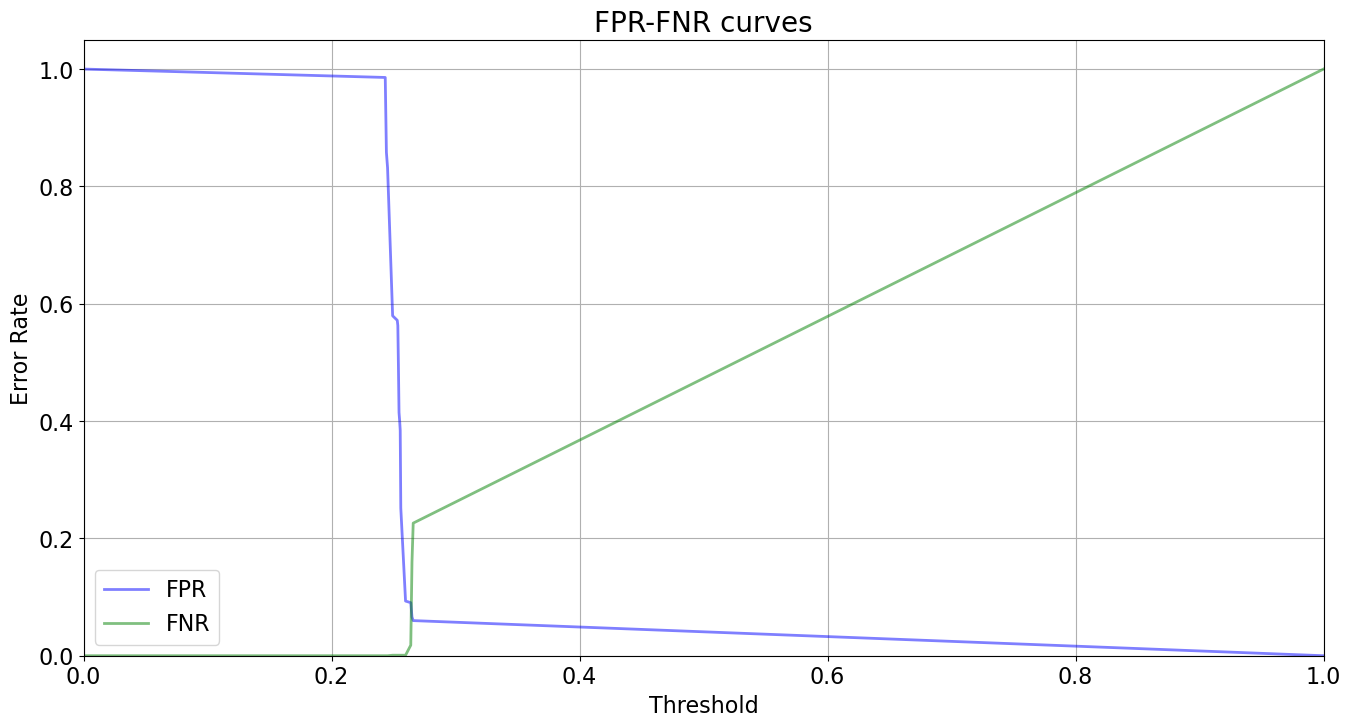

In [135]:
plt.figure(figsize=(16, 8))
style = {'alpha':0.5, 'lw':2}

plt.plot(thresholds, fpr, color='blue', label='FPR', **style)
plt.plot(thresholds, fnr, color='green', label='FNR', **style)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16);

In [137]:
from catboost.utils import select_threshold

print(select_threshold(model_with_early_stop, validation_pool, FNR=0.01))
print(select_threshold(model_with_early_stop, validation_pool, FPR=0.01))

0.25969674794552633
1.0


In [138]:
metrics = model_with_early_stop.eval_metrics(
    data=validation_pool,
    metrics=['Logloss','AUC'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [139]:
print('AUC values:\n{}'.format(np.array(metrics['AUC'])))

AUC values:
[0.5        0.5        0.5        0.5        0.50656616 0.50656616
 0.50656616 0.84388319 0.84388319 0.84388319 0.86965203 0.86965203
 0.86965203 0.86965203 0.86965203 0.95940778]


In [140]:
np.array(model_with_early_stop.get_feature_importance(prettified=True))

array([['residence', 51.602259024260746],
       ['series_group', 46.620152159145334],
       ['creat_type_cd', 1.6957929749634875],
       ['inter_type_cd', 0.07788189224335791],
       ['emui_dev', 0.0034054115999705287],
       ['city_rank', 0.00022277050497044576],
       ['gender', 0.00018023416561248573],
       ['age', 0.0001055331165086797],
       ['user_id', 0.0],
       ['device_size', 0.0],
       ['net_type', 0.0],
       ['task_id', 0.0],
       ['adv_id', 0.0],
       ['adv_prim_id', 0.0],
       ['slot_id', 0.0],
       ['site_id', 0.0],
       ['spread_app_id', 0.0],
       ['hispace_app_tags', 0.0],
       ['app_second_class', 0.0],
       ['app_score', 0.0],
       ['ad_click_list_v001_0', 0.0],
       ['ad_click_list_v002_0', 0.0],
       ['ad_click_list_v002_1', 0.0],
       ['ad_click_list_v002_2', 0.0],
       ['ad_click_list_v002_3', 0.0],
       ['ad_click_list_v002_4', 0.0],
       ['ad_click_list_v003_0', 0.0],
       ['ad_click_list_v003_1', 0.0],
       ['a

In [141]:
np.array(model_with_early_stop.get_feature_importance(
    train_pool, 
    'LossFunctionChange', 
    prettified=True
))

array([['emui_dev', 1.9542424939400505e-07],
       ['city_rank', 3.950248739226225e-08],
       ['gender', 3.684063287767714e-08],
       ['age', 7.71199876181683e-09],
       ['user_id', 0.0],
       ['device_size', 0.0],
       ['net_type', 0.0],
       ['task_id', 0.0],
       ['adv_id', 0.0],
       ['adv_prim_id', 0.0],
       ['slot_id', 0.0],
       ['site_id', 0.0],
       ['spread_app_id', 0.0],
       ['hispace_app_tags', 0.0],
       ['app_second_class', 0.0],
       ['app_score', 0.0],
       ['ad_click_list_v001_0', 0.0],
       ['ad_click_list_v002_0', 0.0],
       ['ad_click_list_v002_1', 0.0],
       ['ad_click_list_v002_2', 0.0],
       ['ad_click_list_v002_3', 0.0],
       ['ad_click_list_v002_4', 0.0],
       ['ad_click_list_v003_0', 0.0],
       ['ad_click_list_v003_1', 0.0],
       ['ad_click_list_v003_2', 0.0],
       ['ad_click_list_v003_3', 0.0],
       ['ad_click_list_v003_4', 0.0],
       ['ad_close_list_v001_0', 0.0],
       ['ad_close_list_v002_0', 0.0],
  

In [142]:
import shap

In [143]:
# DF, based on which importance is checked
X_importance = X_validation

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model_with_early_stop)
shap_values = explainer.shap_values(X_importance)

In [169]:
test = test.drop(columns = ['log_id', 'unix_ts_minute'], axis = 1)

In [174]:
test.shape

(1003240, 37)

In [178]:
test = test.astype({'ad_click_list_v002_1':'int64', 'ad_click_list_v002_2':'int64', 'ad_click_list_v002_3':'int64', 'ad_click_list_v002_4':'int64',
                   'ad_click_list_v003_1':'int64', 'ad_click_list_v003_2':'int64','ad_click_list_v003_3':'int64', 'ad_click_list_v003_4':'int64'})

In [289]:
raw_pred = model_with_early_stop.predict(
    test,
    prediction_type='RawFormulaVal'
)

print(raw_pred)

[-1.13212255 -1.13212255 -1.13212255 ... -1.13212255 -1.13212255
 -1.13212255]


In [180]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.2437696 0.2437696 0.2437696 ... 0.2437696 0.2437696 0.2437696]


In [291]:
len(probabilities)

1003240

In [292]:
len(test)

1003240

In [198]:
data = train_test_split(X, y, test_size=0.5, random_state=123) #pool
X_train, X_validation, y_train, y_validation = data

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    cat_features=cat_features
)

validation_pool = Pool(
    data=X_validation, 
    label=y_validation, 
    cat_features=cat_features
)

In [202]:
train.shape

(6672278, 38)

In [203]:
6672278/2

3336139.0

In [209]:
train_val = train[3336139:]
train1 = train[:3336139]

In [214]:
y = train1.clicked
X = train1.drop('clicked', axis = 1)

In [261]:
y_train = y[:100000]
X_train = X[:100000]

In [262]:
X_train.head()

,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v002_0,ad_close_list_v003_0,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name
0,35320559,2580,3,22097,2616,4,1466,2,40,0,209,18,12,6,17019,1105,1479,1545,2080,1936,151,274,312,350,228,27575,1393,166,5,0,12,154,2,4,4,18,120
1,88400003,2580,3,21493,2616,4,1466,2,40,0,209,18,12,6,15764,1036,1479,1545,1124,1936,151,274,152,350,228,31941,1036,162,3,0,20,337,5,14,2,25,246
2,33566032,2580,3,32961,2616,4,1466,2,40,0,209,18,12,6,15764,1036,1479,1545,1672,1936,259,274,114,240,304,31941,1518,162,7,0,30,149,2,4,4,19,172
3,20607236,2580,3,34848,2616,6,1466,2,40,0,209,18,12,6,17621,1036,1479,1545,1344,1936,208,274,240,300,228,31941,1036,162,3,0,2,132,2,14,2,16,141
4,17834004,2580,3,10445,2616,4,1466,2,40,0,209,18,12,6,32551,1036,1479,1545,1842,1936,151,274,309,150,228,31941,1036,162,8,0,24,53,2,13,0,20,17


In [215]:
from catboost import Pool
pool = Pool(data=X, label=y, cat_features=cat_features)

In [ ]:
y_val = train_val.clicked
X_val = train_val.drop('clicked', axis = 1)

In [267]:
train_pool = Pool(
    data=X, 
    label=y, 
    cat_features=cat_features
)

validation_pool = Pool(
    data=X_val, 
    label=y_val, 
    cat_features=cat_features
)

In [272]:
model1 = CatBoostClassifier(
    eval_metric='AUC',
    iterations=5000,
    learning_rate=0.01,
    early_stopping_rounds=20,
    verbose = 100
)

In [273]:
model1.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoostError: bad allocation

In [276]:
print(model_with_early_stop)

In [288]:
%whos

Variable                Type                          Data/Info
---------------------------------------------------------------
CatBoostClassifier      type                          <class 'catboost.core.CatBoostClassifier'>
Pool                    type                          <class 'catboost.core.Pool'>
X                       DataFrame                               user_id  device<...>672278 rows x 37 columns]
X_importance            DataFrame                               user_id  device<...>334456 rows x 37 columns]
X_val                   DataFrame                               user_id  device<...>336139 rows x 37 columns]
b                       str                           modela
cat_features            list                          n=37
catboost                module                        <module 'catboost' from '<...>\\catboost\\__init__.py'>
clf                     CatBoostClassifier            <catboost.core.CatBoostCl<...>ct at 0x00000273AB2A8610>
curve                 

In [ ]:
del y_val, y_train, y, train1, train_val, X_train

In [324]:
sub.shape

(1003240, 2)

In [325]:
test.shape

(1003240, 46)

In [326]:
test.head()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v001_1,ad_click_list_v001_2,ad_click_list_v001_3,ad_click_list_v001_4,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v001_1,ad_close_list_v001_2,ad_close_list_v001_3,ad_close_list_v001_4,ad_close_list_v002_0,ad_close_list_v002_1,ad_close_list_v002_2,ad_close_list_v002_3,ad_close_list_v002_4,ad_close_list_v003_0,ad_close_list_v003_1,ad_close_list_v003_2,ad_close_list_v003_3,ad_close_list_v003_4
0,6672278,24320453,92261551,2172,1,12294,1721,5,1404,3,40,0,294,18,6,0,23142,31827.0,25255.0,18746.0,11581.0,1966,1509.0,1109.0,1734.0,1449.0,143,108.0,174.0,114.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
1,6672279,24320455,81212715,2172,0,26394,1721,5,1922,3,40,0,294,24,13,10,23142,33167.0,17019.0,16378.0,31650.0,1112,NaN,NaN,1734.0,1154.0,143,NaN,NaN,194.0,NaN,24107,12210.0,30890.0,28922.0,31139.0,1218,1753.0,1033.0,1795.0,2080.0,150,NaN,227.0,NaN,NaN
2,6672280,24320455,92261551,2172,0,12294,1721,5,2066,3,40,0,294,24,13,0,23142,18626.0,34848.0,21582.0,NaN,1966,1518.0,1223.0,1340.0,1535.0,143,108.0,140.0,162.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
3,6672281,24320455,92261551,2172,0,12294,1721,5,1731,3,40,0,294,8,5,0,23142,32961.0,19049.0,18746.0,12331.0,1966,1041.0,1041.0,1734.0,1154.0,257,108.0,174.0,194.0,NaN,31941,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
4,6672282,24320457,92261551,2172,2,12294,1721,5,1562,3,40,0,294,8,6,0,23142,24464.0,30655.0,18746.0,35623.0,1966,1036.0,1633.0,1734.0,1154.0,168,108.0,367.0,194.0,320.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,162.0,NaN,NaN,NaN


In [328]:
test.tail()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v001_1,ad_click_list_v001_2,ad_click_list_v001_3,ad_click_list_v001_4,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v001_1,ad_close_list_v001_2,ad_close_list_v001_3,ad_close_list_v001_4,ad_close_list_v002_0,ad_close_list_v002_1,ad_close_list_v002_2,ad_close_list_v002_3,ad_close_list_v002_4,ad_close_list_v003_0,ad_close_list_v003_1,ad_close_list_v003_2,ad_close_list_v003_3,ad_close_list_v003_4
1003235,7675513,24321929,93865755,2172,1,12294,1721,5,1036,2,40,0,294,24,11,0,23142,14584.0,26913.0,18746.0,NaN,1690,1114.0,NaN,1734.0,1154.0,190,108.0,252.0,194.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1036,1753.0,1033.0,1172.0,NaN,150,330.0,227.0,168.0,NaN
1003236,7675514,24321931,93865755,2172,1,12294,1721,5,1036,2,40,0,294,24,6,0,23142,31941.0,25255.0,18746.0,29852.0,1966,1106.0,1028.0,1734.0,1154.0,143,108.0,252.0,194.0,317.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,NaN,162.0,168.0,NaN
1003237,7675515,24321939,93865755,2172,1,12294,1721,5,1036,2,40,0,294,24,13,0,23142,14584.0,10282.0,18746.0,NaN,1966,1220.0,NaN,1734.0,1154.0,143,108.0,252.0,194.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,1172.0,NaN,150,NaN,162.0,168.0,NaN
1003238,7675516,24321939,93865755,2172,0,12294,1721,5,1036,2,40,0,294,24,6,0,23142,20436.0,36257.0,18746.0,19260.0,1966,1994.0,1858.0,1734.0,1154.0,143,108.0,252.0,194.0,152.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,NaN,162.0,NaN,NaN
1003239,7675517,24321945,93865755,2172,1,12294,1721,5,1036,2,40,0,294,24,11,0,23142,16086.0,25255.0,18746.0,34426.0,1966,1552.0,1126.0,1734.0,1154.0,143,108.0,252.0,194.0,320.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,NaN,227.0,271.0,NaN


In [329]:
sub.tail()

,log_id,pctr
1003235,7675513,0.24377
1003236,7675514,0.24377
1003237,7675515,0.24377
1003238,7675516,0.24377
1003239,7675517,0.24377


In [330]:
sub.head()

,log_id,pctr
0,6672278,0.24377
1,6672279,0.24377
2,6672280,0.24377
3,6672281,0.24377
4,6672282,0.24377


In [331]:
test.head()

,log_id,unix_ts_minute,user_id,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001_0,ad_click_list_v001_1,ad_click_list_v001_2,ad_click_list_v001_3,ad_click_list_v001_4,ad_click_list_v002_0,ad_click_list_v002_1,ad_click_list_v002_2,ad_click_list_v002_3,ad_click_list_v002_4,ad_click_list_v003_0,ad_click_list_v003_1,ad_click_list_v003_2,ad_click_list_v003_3,ad_click_list_v003_4,ad_close_list_v001_0,ad_close_list_v001_1,ad_close_list_v001_2,ad_close_list_v001_3,ad_close_list_v001_4,ad_close_list_v002_0,ad_close_list_v002_1,ad_close_list_v002_2,ad_close_list_v002_3,ad_close_list_v002_4,ad_close_list_v003_0,ad_close_list_v003_1,ad_close_list_v003_2,ad_close_list_v003_3,ad_close_list_v003_4
0,6672278,24320453,92261551,2172,1,12294,1721,5,1404,3,40,0,294,18,6,0,23142,31827.0,25255.0,18746.0,11581.0,1966,1509.0,1109.0,1734.0,1449.0,143,108.0,174.0,114.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
1,6672279,24320455,81212715,2172,0,26394,1721,5,1922,3,40,0,294,24,13,10,23142,33167.0,17019.0,16378.0,31650.0,1112,NaN,NaN,1734.0,1154.0,143,NaN,NaN,194.0,NaN,24107,12210.0,30890.0,28922.0,31139.0,1218,1753.0,1033.0,1795.0,2080.0,150,NaN,227.0,NaN,NaN
2,6672280,24320455,92261551,2172,0,12294,1721,5,2066,3,40,0,294,24,13,0,23142,18626.0,34848.0,21582.0,NaN,1966,1518.0,1223.0,1340.0,1535.0,143,108.0,140.0,162.0,NaN,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
3,6672281,24320455,92261551,2172,0,12294,1721,5,1731,3,40,0,294,8,5,0,23142,32961.0,19049.0,18746.0,12331.0,1966,1041.0,1041.0,1734.0,1154.0,257,108.0,174.0,194.0,NaN,31941,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,330.0,NaN,NaN,NaN
4,6672282,24320457,92261551,2172,2,12294,1721,5,1562,3,40,0,294,8,6,0,23142,24464.0,30655.0,18746.0,35623.0,1966,1036.0,1633.0,1734.0,1154.0,168,108.0,367.0,194.0,320.0,33877,12210.0,30890.0,28922.0,31139.0,1134,1753.0,1033.0,NaN,NaN,150,162.0,NaN,NaN,NaN
